# Домашнее задание 1. Основы обучения нейронных сетей

## Задание:
1. Видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.
2. Проведите анализ — что приводит к ухудшению точности нейронной сети?
3. Что приводит к увеличению ее точности?

### Задача из вебинара 1

In [296]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

(1797, 64)


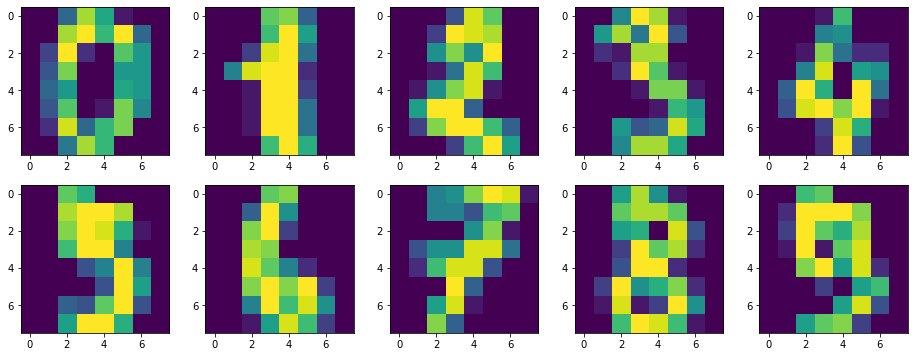

In [297]:
# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape)

# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]))

In [298]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [299]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [300]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [301]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [302]:
# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [303]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5

# присваивание случайных весов
np.random.seed(1)
w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

# скорость обучения (learning rate)
learning_rate = 0.1

# количество итераций
num_epochs = 100

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

# процесс обучения
for i in range(num_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение (back propagation)
    # с использованием градиентного спуска
    layer2_error = layer2 - y_train  # производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_grad.dot(w1.T)
    layer1_grad = layer1_error * sigmoid_deriv(layer1)
    
    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate
    
    # ошибка модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    
    # метрики качества
    preds = np.argmax(layer2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = (preds == labels).sum() * 100 / len(labels)
    metrics.append(accuracy)

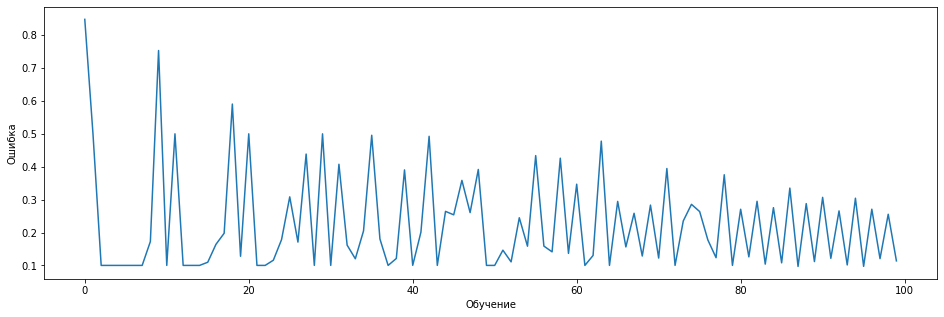

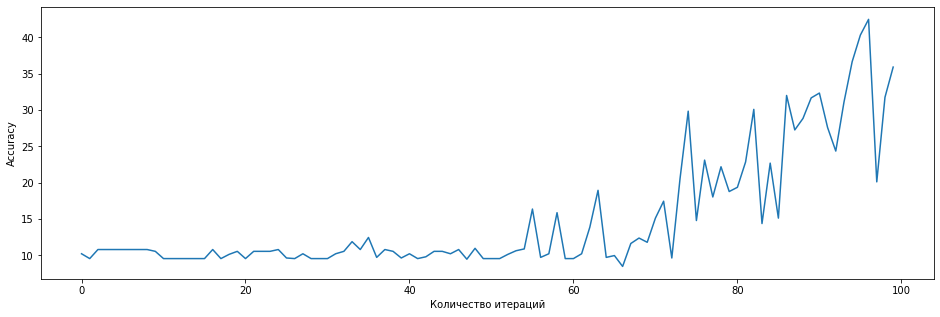

In [304]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [305]:
y_train[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

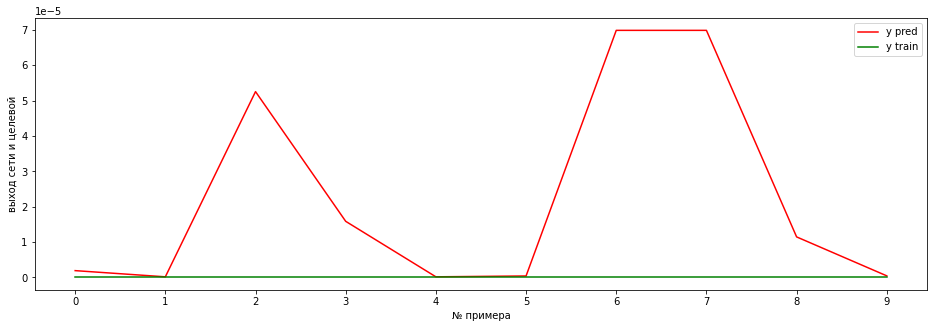

accuracy на обучении 35.91%


In [306]:
N = 10
label = 2
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

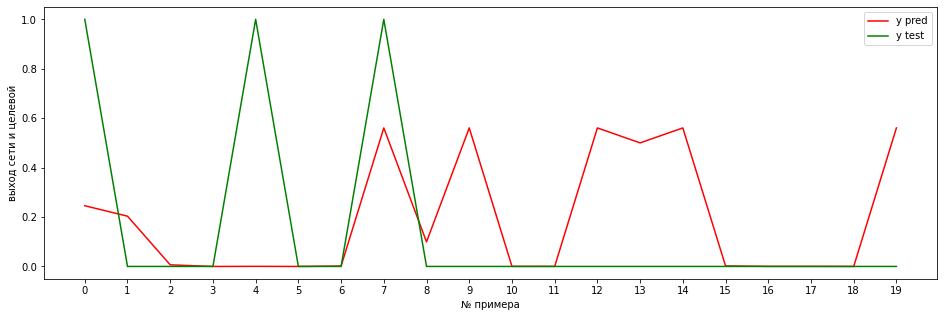

accuracy на тесте 46.63%


In [307]:
# прямое распространение(feed forward)
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

### Будем изменять [число нейронов скрытого слоя](#neuron_numb), [скорость обучения ](#learning_rate) и [количество итераций](#num_epochs) с целью увеличения показателя accuracy на тесте. 
[Итоговый вывод](#result) о том, что способствует ухудшению/улучшению точности нейронной сети сформулирован в конце ноутбука.

Для этого сначала составим функцию вычисления метрики нейронной сети на трейне и тесте при заданных числе нейронов, скорости обучения и числе эпох. 

In [308]:
def get_nn_metrics(neuron_numb,learning_rate,num_epochs):
    """ Вычисляет метрику нейронной сети на трейне и тесте 
        при заданных числе нейронов, скорости обучения и числе эпох.
    """
        
    accuracy_train_list = []
    accuracy_test_list = []
    
    # присваивание случайных весов
    np.random.seed(1)
    w0 = np.random.random((64, neuron_numb))  
    w1 = np.random.random((neuron_numb, 10))  
    
    # процесс обучения
    for i in range(num_epochs):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение (back propagation)
        #  с использованием градиентного спуска
        layer2_error = layer2 - y_train  # производная функции потерь
        layer2_grad = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_grad.dot(w1.T)
        layer1_grad = layer1_error * sigmoid_deriv(layer1)

        w1 -= layer1.T.dot(layer2_grad) * learning_rate
        w0 -= layer0.T.dot(layer1_grad) * learning_rate

    # метрики качества на трейне
    preds = np.argmax(layer2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy_train = (preds == labels).sum() * 100 / len(labels)
        
    # получение предсказаний(feed forward)
    layer0_test = X_test
    layer1_test = sigmoid(np.dot(layer0_test, w0))
    layer2_test = sigmoid(np.dot(layer1_test, w1))

    # метрика модели на тесте
    preds_test = np.argmax(layer2_test, axis=1)
    labels_test = np.argmax(y_test, axis=1)
    accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

    return accuracy_train, accuracy_test

In [309]:
# пример работы функции на данных из задачи вебинара
accuracy_train, accuracy_test = get_nn_metrics(5,0.1,100)
accuracy_train, accuracy_test

(35.910224438902745, 46.63299663299663)

#### Число нейронов скрытого слоя <a id='neuron_numb'></a>

In [310]:
%%time

# число нейронов скрытого слоя
neuron_numb_list = [i for i in range(1, 111)]

# скорость обучения (learning rate)
learning_rate = 0.1

# количество итераций
num_epochs = 100

accuracy_train_list = []
accuracy_test_list = []

for neuron_numb in neuron_numb_list:
    accuracy_train, accuracy_test = get_nn_metrics(neuron_numb,learning_rate,num_epochs)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
    
pd.DataFrame({'neuron_numb': neuron_numb_list, 
              'train_accuracy': accuracy_train_list,
              'test_accuracy': accuracy_test_list}).sort_values(by='test_accuracy',ascending=False)

Wall time: 40.6 s


,neuron_numb,train_accuracy,test_accuracy
98,99,91.687448,89.057239
87,88,88.611804,88.383838
76,77,85.203658,86.531987
88,89,86.118038,86.195286
109,110,86.699917,85.690236
...,...,...,...
1,2,11.305071,26.430976
16,17,39.983375,21.380471
79,80,39.983375,18.518519
2,3,20.448878,15.824916


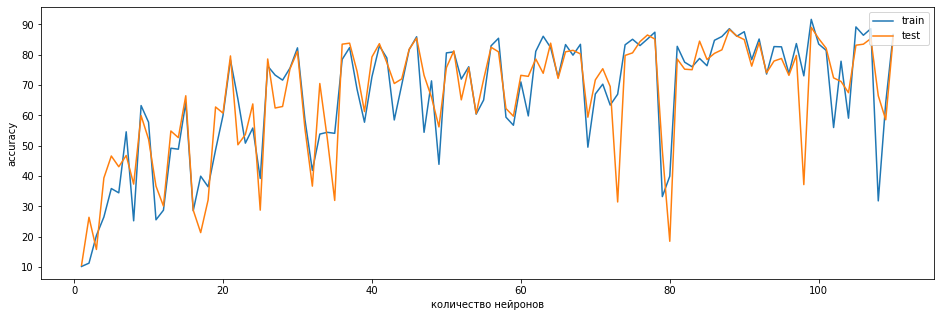

In [311]:
plt.figure(figsize=(16, 5))
plt.plot(neuron_numb_list, accuracy_train_list,label = 'train')
plt.plot(neuron_numb_list, accuracy_test_list,label = 'test')
plt.xlabel('количество нейронов')
plt.ylabel('accuracy')
plt.legend(loc = 'upper right')
plt.show()

**Вывод:** с увеличением количества нейронов accuracy на тесте увеличивается не монотонно. Лучшее значение числа нейронов из рассматриваемого промежутка: 99.

#### Скорость обучения <a id='learning_rate'></a>

In [312]:
%%time

# число нейронов скрытого слоя
neuron_numb = 99  #лучшее значение из предыдущего пункта

# скорость обучения (learning rate)
learning_rate_list = [i for i in np.linspace(0.01, 1, num=100)]

# количество итераций
num_epochs = 100

accuracy_train_list = []
accuracy_test_list = []

for learning_rate in learning_rate_list:
    accuracy_train, accuracy_test = get_nn_metrics(neuron_numb,learning_rate,num_epochs)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
    
pd.DataFrame({'learning_rate': learning_rate_list, 
              'train_accuracy': accuracy_train_list,
              'test_accuracy': accuracy_test_list}).sort_values(by='test_accuracy',ascending=False)

Wall time: 1min 27s


,learning_rate,train_accuracy,test_accuracy
0,0.01,96.342477,95.454545
1,0.02,95.926850,93.771044
3,0.04,94.014963,90.740741
2,0.03,91.022444,90.235690
9,0.10,91.770574,89.225589
...,...,...,...
36,0.37,37.905237,50.000000
43,0.44,23.857024,45.454545
28,0.29,32.169576,43.771044
24,0.25,37.489609,34.175084


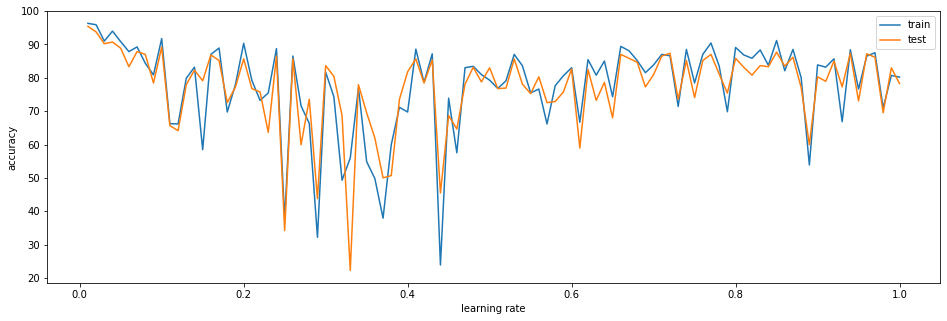

In [313]:
plt.figure(figsize=(16, 5))
plt.plot(learning_rate_list, accuracy_train_list,label = 'train')
plt.plot(learning_rate_list, accuracy_test_list,label = 'test')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.legend(loc = 'upper right')
plt.show()

**Вывод:** с увеличением скорости обучения accuracy на тесте убывает не монотонно. Лучшее значение из рассматриваемого промежутка: 0.01.

#### Число эпох <a id='num_epochs'></a>

In [314]:
%%time

# число нейронов скрытого слоя
neuron_numb = 99  #лучшее значение из предыдущего пункта

# скорость обучения (learning rate)
learning_rate = 0.01  #лучшее значение из предыдущего пункта

# количество итераций
num_epochs_list = [i for i in range(500, 3001, 100)]

accuracy_train_list = []
accuracy_test_list = []

for num_epochs in num_epochs_list:
    accuracy_train, accuracy_test = get_nn_metrics(neuron_numb,learning_rate,num_epochs)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
    
pd.DataFrame({'num_epochs': num_epochs_list, 
              'train_accuracy': accuracy_train_list,
              'test_accuracy': accuracy_test_list}).sort_values(by='test_accuracy',ascending=False)

Wall time: 3min 50s


,num_epochs,train_accuracy,test_accuracy
1,600,99.085619,97.643098
0,500,99.085619,97.474747
3,800,99.251870,97.138047
4,900,99.334996,97.138047
6,1100,99.584372,97.138047
10,1500,100.000000,96.969697
16,2100,100.000000,96.969697
15,2000,100.000000,96.969697
14,1900,100.000000,96.969697
11,1600,100.000000,96.969697


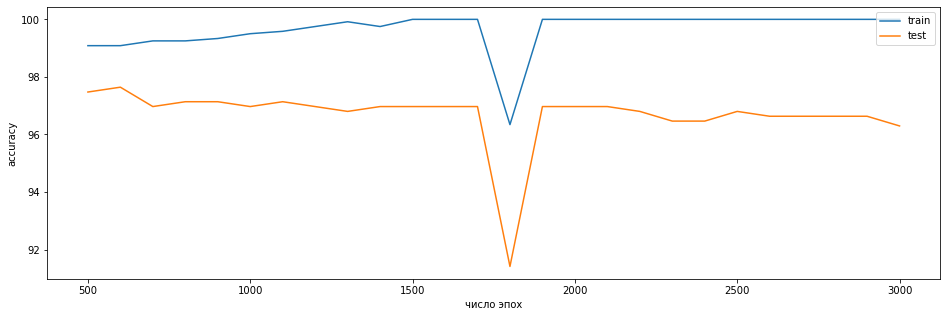

In [315]:
plt.figure(figsize=(16, 5))
plt.plot(num_epochs_list, accuracy_train_list,label = 'train')
plt.plot(num_epochs_list, accuracy_test_list,label = 'test')
plt.xlabel('число эпох')
plt.ylabel('accuracy')
plt.legend(loc = 'upper right')
plt.show()

**Вывод:** с увеличением числа эпох более 600 accuracy на тесте убывает не монотонно. Лучшее значение из рассматриваемого промежутка: 600.

#### Итоговый вывод <a id='result'></a>

На основании проведенного исследования можно заключить, что:

1. К увеличению точности нейронной сети приводят увеличение количества нейронов и увеличение числа эпох (не более 600).

2. Ухудшению точности нейронной сети способствуют увеличение скорости обучения и указание слишком большого числа эпох (>1000).

**Оптимальные параметры нейронной сети:**
neuron_numb = 99, learning_rate = 0.01, num_epochs = 600.

**В этом случае метрика accuracy на тесте:** 97.643098.